In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(11,8)})
pd.pandas.set_option("display.max_columns",None)

In [2]:
df = pd.read_csv("watches.csv")

In [4]:
data = df.copy()

In [8]:
# drop unwanted conums
data.drop(["Unnamed: 0","images_links"],axis=1,inplace=True)

In [9]:
data.head()

,titles,brand_names,prices,offers,Gender,Type
0,NP2576WM01 Analog Watch - For Women,Titan,"₹3,754",20% off,Women,Analog
1,PWRM-King Day And Date Functioning High Qualit...,Piaoma,₹270,86% off,Unisex,none
2,77085PP03 Volt Analog Watch - For Men,SONATA,₹524,25% off,Men,Analog
3,LCS-8188 TRENDING DAY & DATE FUNCTIONING Analo...,LOIS CARON,₹319,82% off,Unisex,Analog
4,Gents Exclusive 3 Designer Combo (Casual+Party...,Rizzly,₹343,61% off,Unisex,none


In [11]:
data.tail()

,titles,brand_names,prices,offers,Gender,Type
970,LCS-1456 Day And Date Functioning High Quality...,Espoir,₹273,50% off,Unisex,Analog
971,ORIGINAL Fancy Present All Diamond Black Silve...,DKERAOD,₹299,71% off,Unisex,none
972,AX2155 Hampton Analog Watch - For Men,A/X ARMANI EXCHANGE,"₹6,997",85% off,Men,Analog
973,2229685 Analog Watch - For Men,Mast & Harbour,"₹1,129",15% off,Men,Analog
974,ANLG-428-BROWN-BRWN All Brown Boys Series Anal...,ANALOGUE,₹214,10% off,Unisex,Analog


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   titles       975 non-null    object
 1   brand_names  975 non-null    object
 2   prices       975 non-null    object
 3   offers       975 non-null    object
 4   Gender       975 non-null    object
 5   Type         975 non-null    object
dtypes: object(6)
memory usage: 45.8+ KB


## Data Cleaning

In [24]:
# remove extra character from data
data["prices"] = data["prices"].apply(lambda x:x.replace("₹","")).str.replace(",","").astype(int)

In [29]:
# remove extra character from data
data["offers"] = data["offers"].apply(lambda x:x.replace("%","")).str.replace("off","").astype(int)

In [36]:
# check duplicet
data.duplicated().sum()

173

In [38]:
data.drop_duplicates(inplace=True)

In [39]:
data.shape

(802, 6)

## EDA

In [41]:
# saprate numerical and catigorical colums
catigorical_features = data.dtypes[data.dtypes == "object"].index

In [42]:
catigorical_features

Index(['titles', 'brand_names', 'Gender', 'Type'], dtype='object')

In [43]:
numerical_features = data.dtypes[data.dtypes != "object"].index

In [44]:
numerical_features

Index(['prices', 'offers'], dtype='object')

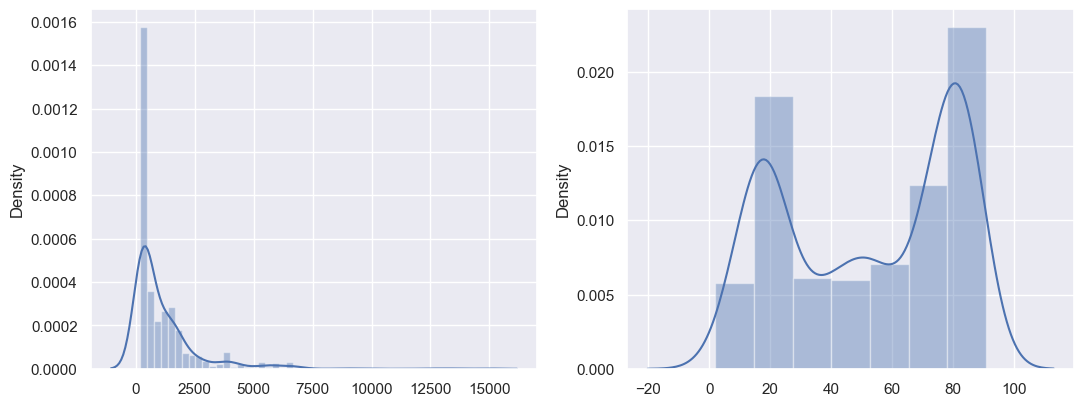

In [48]:
for i in range(0,len(numerical_features)):
    plt.subplot(2,2,i+1)
    sns.distplot(x=data[numerical_features[i]])
    plt.tight_layout()

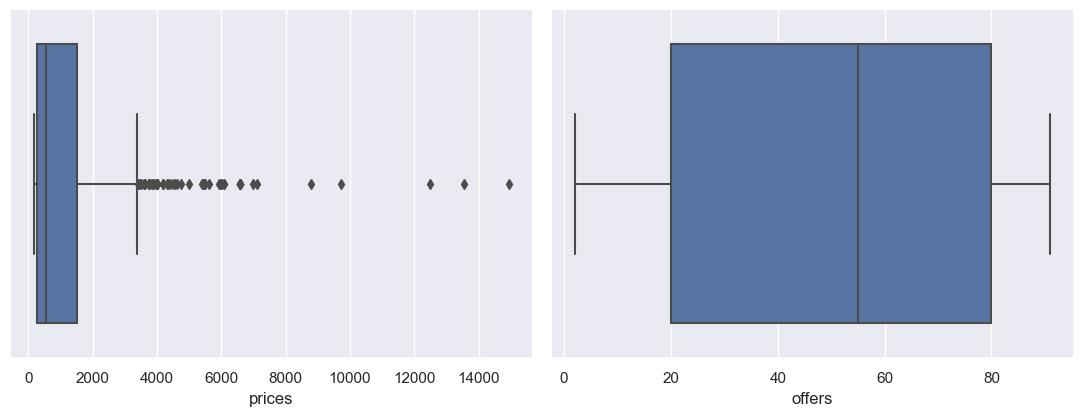

In [49]:
for i in range(0,len(numerical_features)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=data[numerical_features[i]])
    plt.tight_layout()

In [62]:
top10brand = data.groupby("brand_names")["prices"].sum().sort_values(ascending=False).reset_index().head(10)

In [63]:
top10brand

,brand_names,prices
0,Titan,242343
1,Fastrack,180118
2,SONATA,92947
3,FOSSIL,68553
4,LACOSTE,44279
5,CASIO,43953
6,TIMEX,42328
7,VAN HEUSEN,22792
8,PETER ENGLAND,18493
9,Allen Solly,14866


<AxesSubplot:xlabel='brand_names', ylabel='prices'>

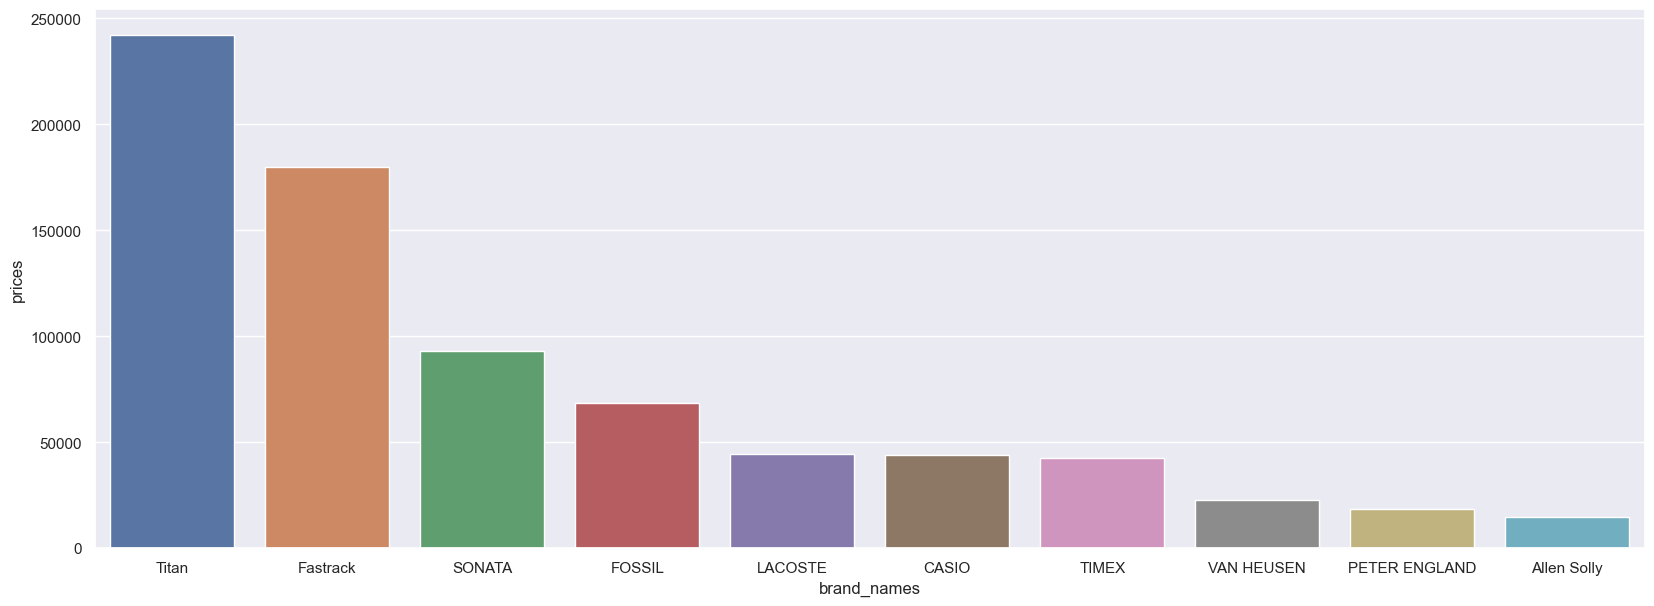

In [65]:
plt.figure(figsize=(20,7))
sns.barplot(x="brand_names",y="prices",data=top10brand)

In [69]:
offer = data.groupby("brand_names")["offers"].sum().sort_values(ascending=False).reset_index().head(10)

In [70]:
offer

,brand_names,offers
0,Fastrack,3820
1,SONATA,3604
2,Titan,2862
3,TIMEX,1419
4,Septem,1326
5,LIMESTONE,1253
6,Trex,1101
7,hala,1088
8,FOGG,1028
9,Daniel Jubile,1008


<AxesSubplot:xlabel='brand_names', ylabel='offers'>

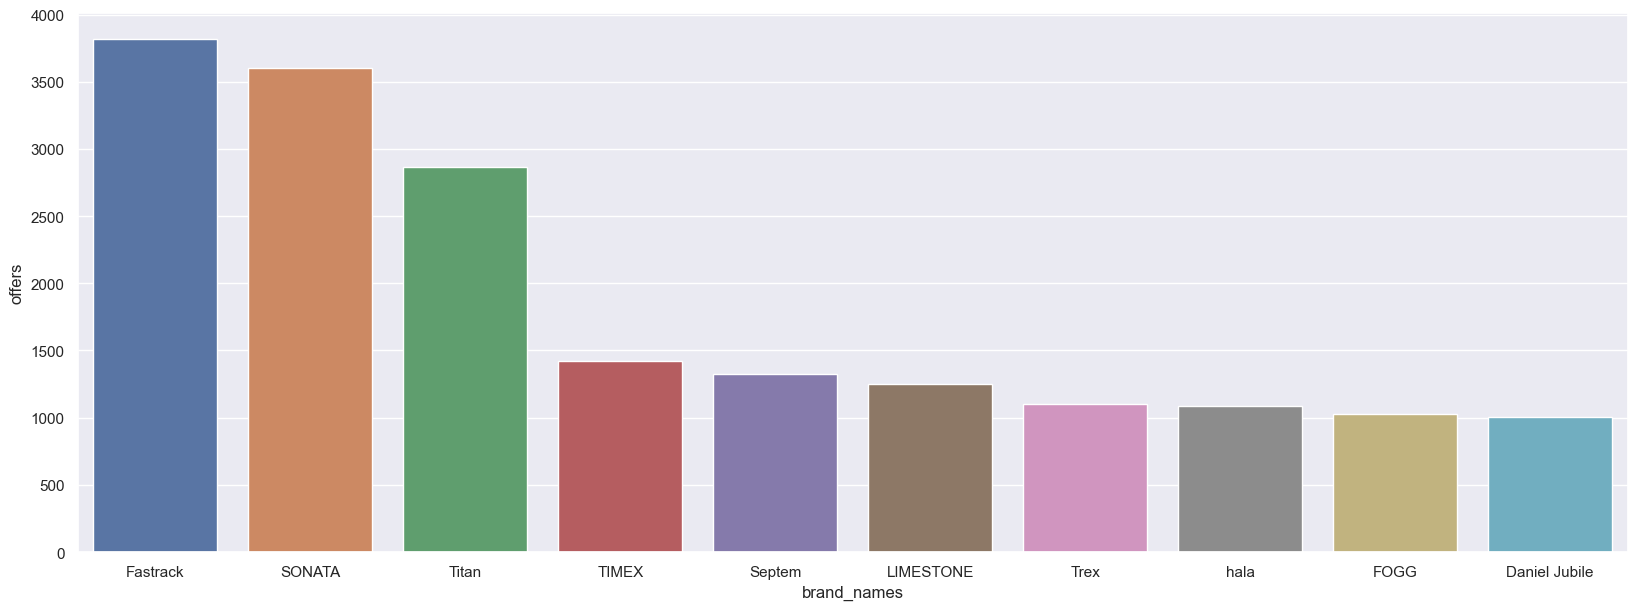

In [72]:
plt.figure(figsize=(20,7))
sns.barplot(x="brand_names",y="offers",data=offer)

<AxesSubplot:xlabel='Gender', ylabel='count'>

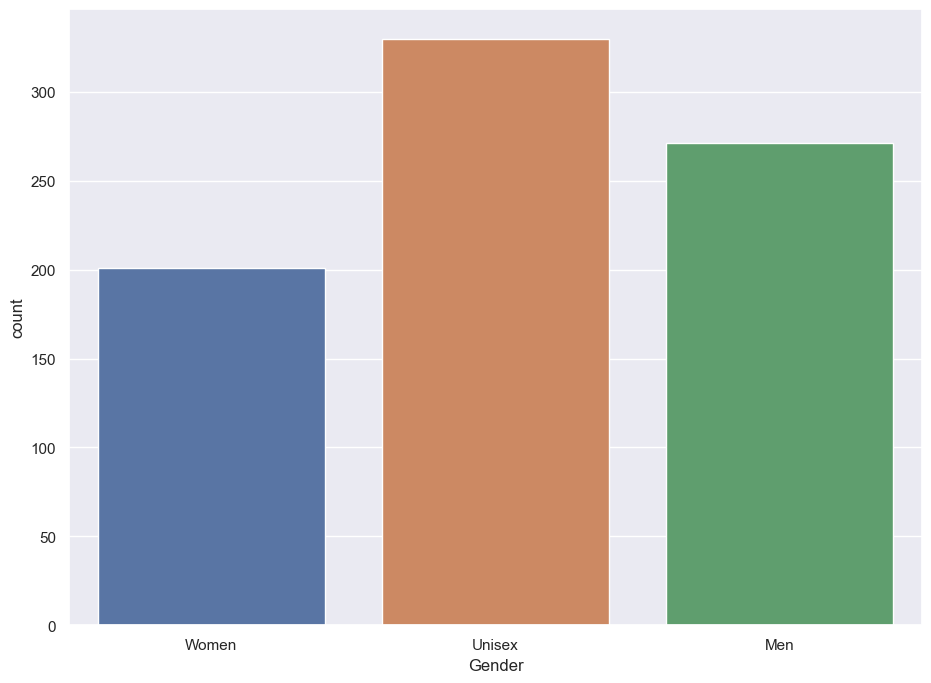

In [73]:
sns.countplot(data["Gender"])

In [77]:
data.groupby("brand_names")["prices"].sum().sort_values(ascending=False).reset_index().tail(5)

,brand_names,prices
116,Zanques,238
117,TrackFly,223
118,Kolpsy,209
119,Bowger,195
120,YOUTH CLUB,189
